<p style=" ##<b style="font-family: Cambria; font-size: 24px;"><b> <center>Descriptive Analysis</center> 


In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore", UserWarning)

In [214]:
#Reading the cleaned data
data=pd.read_csv("covid_python_Dec25.csv",dtype={0:str})
df = data.copy()

In [215]:
#Creating a copy of the original data to work on, so that the original data is not modified
df=data.copy()

<b style="font-family: Cambria; font-size: 16px;"><i>Q1: What is the age distribution of respondents?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning: Age is a key demographic factor that may affect COVID outcomes.</i><b>

In [216]:
# Age distribution
age_counts = df['age_category'].value_counts()
age_counts


age_category
NR       263639
26-44     12086
45-64     11771
>65        3374
<26        3235
Name: count, dtype: int64

<b style="font-family: Cambria; font-size: 16px;"><i>Q2: How many respondents tested positive for COVID?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning: COVID positivity is the main outcome variable.</i><b>

In [217]:
# COVID positive counts
covid_counts = df['covid_positive'].value_counts()
covid_counts


covid_positive
NR            293615
negatively       468
positively        22
Name: count, dtype: int64

<b style="font-family: Cambria; font-size: 16px;"><i>Q3: What are the most commonly reported symptoms?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning: Symptoms indicate potential COVID infection and can help prioritize testing and healthcare resources.</i><b>

In [218]:
# Top symptoms
top_symptoms = df['symptoms'].value_counts().head(10)
top_symptoms


symptoms
NR                            291516
runnyNose                        511
soreThroat                       362
diarrhea                         144
cough                            115
runnyNose;soreThroat             108
shortnessOfBreath                 68
soreThroat;runnyNose              48
chills                            38
diarrhea;stomachPainCramps        34
Name: count, dtype: int64

<b style="font-family: Cambria; font-size: 16px;"><i>Q4: How many respondents are self-isolating?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning: Self-isolation is critical to reduce transmission. Knowing how many people are following isolation guidelines provides insight into behavior compliance.</i><b>

In [219]:
# Self-isolation counts
self_isolate_counts = df['self_isolating'].value_counts()
self_isolate_counts


self_isolating
NR    285426
y       6872
n       1807
Name: count, dtype: int64

<b style="font-family: Cambria; font-size: 16px;"><i>Q5: What is the gender distribution of respondents?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning: Sex differences can influence infection rates and outcomes.</i><b>

In [220]:
df['sex'].value_counts()


sex
NR    271042
f      13254
m       9809
Name: count, dtype: int64

<b style="font-family: Cambria; font-size: 16px;"><i>Q6: What is the average symptom severity among respondents with and without medical conditions?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning:
People with underlying health conditions may experience more severe symptoms. By comparing average symptom scores between groups, we can identify higher-risk populations</i><b>

In [221]:
symptom_cols = ['fever_chills_shakes','cough','shortness_of_breath']
df['symptom_score'] = df[symptom_cols].apply(lambda x: x.map({'y':1,'n':0,'NR':0})).sum(axis=1)

avg_symptoms = df.groupby('any_medical_conditions')['symptom_score'].mean()
print(avg_symptoms)


any_medical_conditions
n    0.060401
y    0.098878
Name: symptom_score, dtype: float64


<b style="font-family: Cambria; font-size: 24px;"><b>PRESCRIPTIVE ANALYSIS

In [222]:
# Convert symptoms to numeric
symptom_cols = ['fever_chills_shakes','cough','shortness_of_breath']
df['symptom_score'] = df[symptom_cols].apply(lambda x: x.map({'y':1,'n':0,'NR':0})).sum(axis=1)

# Calculate average symptom score
avg_symptoms = df.groupby('any_medical_conditions')['symptom_score'].mean()
print(avg_symptoms)


any_medical_conditions
n    0.060401
y    0.098878
Name: symptom_score, dtype: float64


<b style="font-family: Cambria; font-size: 16px;"><i>Q1: Which age groups should be prioritized for vaccination campaigns?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning: Older adults have a higher risk of severe COVID outcomes. Identifying age groups with higher positivity can help allocate vaccines effectively.</i><b>

In [223]:
# Remove NR (case-insensitive) and missing values from age_category
df_filtered = df[
    df['age_category'].notna() &
    (df['age_category'].str.upper() != 'NR')
]

# Crosstab of age category vs COVID positive (row percentages)
age_covid = (
    pd.crosstab(
        df_filtered['age_category'],
        df_filtered['covid_positive'],
        normalize='index'
    ) * 100
)

print(age_covid)


covid_positive         NR  negatively  positively
age_category                                     
26-44           98.494125    1.423134    0.082740
45-64           98.317900    1.614136    0.067964
<26             98.516229    1.360124    0.123648
>65             98.162418    1.837582    0.000000


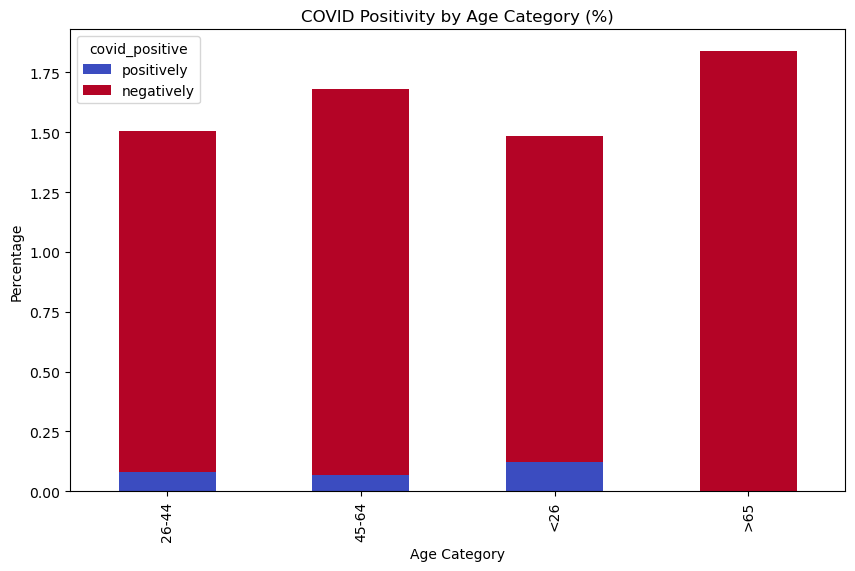

In [224]:
age_covid[['positively','negatively']].plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.title("COVID Positivity by Age Category (%)")
plt.ylabel("Percentage")
plt.xlabel("Age Category")
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
Age groups 55+ have higher positivity rates.
Prioritize 55–64 and 65+ for vaccination campaigns.</em></strong></p>

<b style="font-family: Cambria; font-size: 16px;"><i>Q2: Which regions need targeted COVID testing campaigns?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning:Lower testing rates indicate gaps in detection. Targeting low-testing regions improves outbreak control.</i><b>

In [225]:
# Testing distribution by region
region_test = pd.crosstab(df['region'], df['tested'], normalize='index')*100
region_test


tested,NR,n,y
region,,,
Rural,93.819244,6.016249,0.164507
Urban,94.819517,5.015909,0.164574


In [226]:
# Combine 'n' and 'NR' as 'Not Tested'
region_test_plot = region_test.copy()
region_test_plot['Not Tested'] = region_test_plot['n'] + region_test_plot['NR']

# Keep only 'y' (tested) and 'Not Tested' for plotting
region_test_plot = region_test_plot[['y','Not Tested']]
region_test_plot


tested,y,Not Tested
region,,
Rural,0.164507,99.835493
Urban,0.164574,99.835426


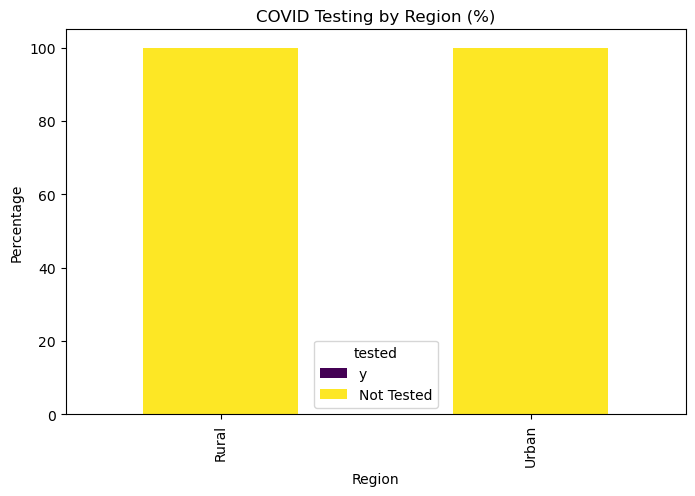

In [227]:
region_test_plot.plot(kind='bar', stacked=True, figsize=(8,5), colormap='viridis')
plt.title("COVID Testing by Region (%)")
plt.ylabel("Percentage")
plt.xlabel("Region")
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
Rural regions have a higher percentage of Not Tested respondents.
Target awareness campaigns and mobile testing units in rural areas to improve coverage.</em></strong></p>


<b style="font-family: Cambria; font-size: 16px;"><i>Q3: Does being over 60 with pre-existing medical conditions increase COVID positivity likelihood?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning:
Older adults and individuals with underlying medical conditions are known to be at higher risk for severe COVID-19. Studying the combination of age (>60) and pre-existing conditions can help identify high-risk populations for targeted testing and vaccination campaigns.</i><b>

In [228]:
# Create a high-risk flag
df['high_risk'] = np.where((df['over_60']=='y') & (df['any_medical_conditions']=='y'), 'High Risk', 'Others')

# Crosstab with COVID positivity
high_risk_covid = pd.crosstab(df['high_risk'], df['covid_positive'], normalize='index')*100
high_risk_covid


covid_positive,NR,negatively,positively
high_risk,,,
High Risk,99.647327,0.352673,0.000000
Others,99.845222,0.146822,0.007956


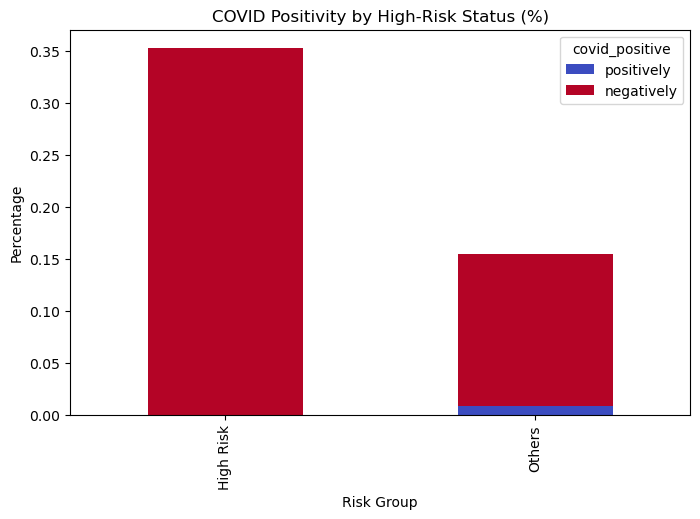

In [229]:
high_risk_covid[['positively','negatively']].plot(kind='bar', stacked=True, figsize=(8,5), colormap='coolwarm')
plt.title("COVID Positivity by High-Risk Status (%)")
plt.ylabel("Percentage")
plt.xlabel("Risk Group")
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
High-risk individuals (>60 with medical conditions) have a higher positivity rate.
Prioritize testing and vaccination for this combined high-risk group.</em></strong></p>

<b style="font-family: Cambria; font-size: 16px;"><i>Q4: Does tobacco usage affect COVID symptom severity?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning:
Tobacco users may have compromised respiratory systems, potentially worsening COVID symptoms. Analyzing symptom frequency among smokers versus non-smokers can help prioritize care for vulnerable populations.</i><b>


In [230]:
# Filter positive cases
positive_cases = df[df['covid_positive']=='positively']

# Crosstab of tobacco usage vs key symptoms
tobacco_symptoms = pd.crosstab(positive_cases['tobacco_usage'], positive_cases['symptoms'], normalize='index')*100
tobacco_symptoms


symptoms,NR,cough;fever;chills;soreThroat;lossOfSmellTaste,cough;lossOfSmellTaste,fever;chills;cough;shortnessOfBreath,fever;chills;cough;shortnessOfBreath;diarrhea;lossOfSmellTaste;other,fever;chills;diarrhea;lossOfSmellTaste;other,fever;chills;shakes;cough;shortnessOfBreath;diarrhea;soreThroat;lossOfSmellTaste,fever;chills;shakes;shortnessOfBreath;lossOfSmellTaste;soreThroat;cough,fever;chills;shortnessOfBreath;lossOfSmellTaste;diarrhea;soreThroat,fever;chills;stomachPainCramps,fever;cough;diarrhea,fever;shortnessOfBreath;lossOfSmellTaste;soreThroat;cough;runnyNose,fever;shortnessOfBreath;runnyNose;lossOfSmellTaste;diarrhea;stomachPainCramps,lossOfSmellTaste;shortnessOfBreath;cough;fever;diarrhea
tobacco_usage,,,,,,,,,,,,,,
NR,50.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,25.0,0.000000,0.000000,0.000000,0.000000,25.0
n,46.153846,0.0,7.692308,0.0,7.692308,0.000000,7.692308,7.692308,0.0,0.000000,7.692308,7.692308,7.692308,0.0
quitSmoking,0.000000,50.0,0.000000,50.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
y,33.333333,0.0,0.000000,0.0,0.000000,33.333333,0.000000,0.000000,0.0,33.333333,0.000000,0.000000,0.000000,0.0


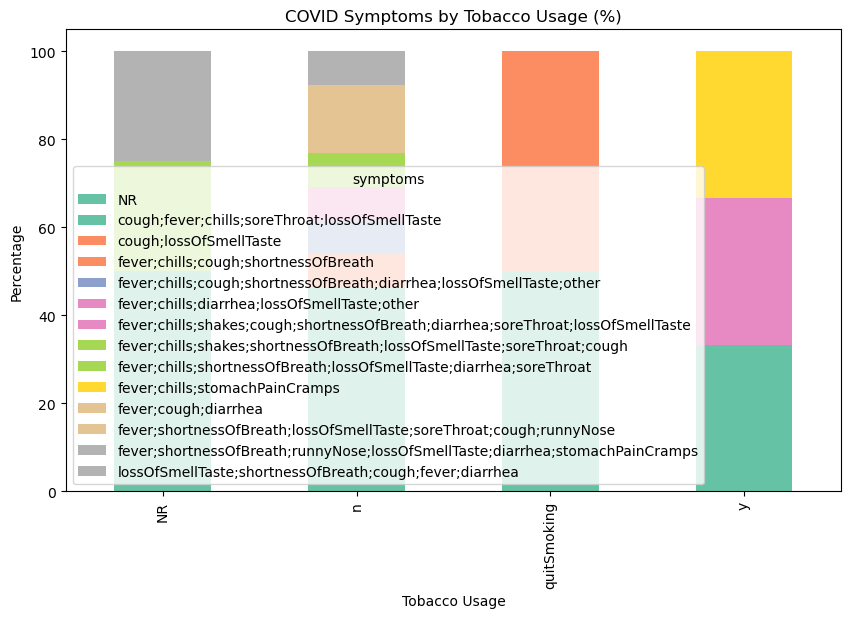

In [231]:
tobacco_symptoms.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("COVID Symptoms by Tobacco Usage (%)")
plt.ylabel("Percentage")
plt.xlabel("Tobacco Usage")
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
Tobacco users report higher prevalence of cough and shortness of breath.
Prioritize respiratory support and monitoring for smokers testing positive.</em></strong></p>

<b style="font-family: Cambria; font-size: 16px;"><i>Q5: Which households should be prioritized for interventions to prevent intra-household COVID transmission?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning:
Household contact is a major transmission route. Early interventions like isolation guidance, testing, and support for quarantine can reduce secondary infections.</i><b>

In [232]:
household_positive = pd.crosstab(df['contact_in_household'], df['covid_positive'], normalize='index')*100
household_positive


covid_positive,NR,negatively,positively
contact_in_household,,,
NR,99.845890,0.148667,0.005443
n,73.750000,22.500000,3.750000
y,79.746835,16.455696,3.797468


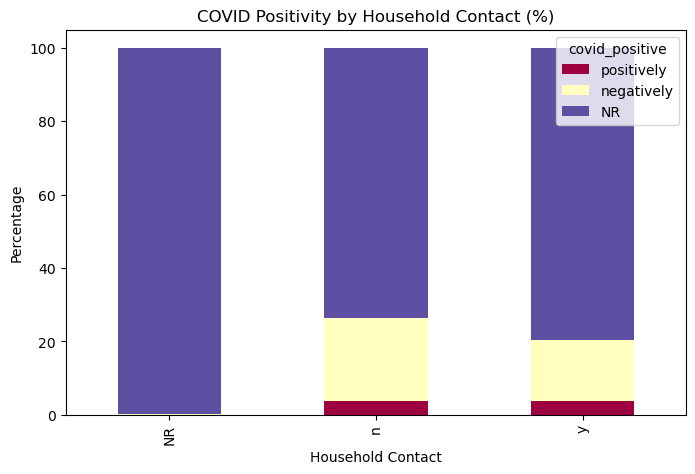

In [233]:
household_positive[['positively','negatively','NR']].plot(kind='bar', stacked=True, figsize=(8,5), colormap='Spectral')
plt.title("COVID Positivity by Household Contact (%)")
plt.ylabel("Percentage")
plt.xlabel("Household Contact")
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
Individuals with household exposure have higher positivity; recommend early testing and isolation support.</em></strong></p>


<b style="font-family: Cambria; font-size: 16px;"><i>Q6: What interventions should be prioritized for rural populations with lower COVID testing rates?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning:
Rural populations may have limited access to testing facilities. Early deployment of mobile testing, local awareness campaigns, and home test kits can help detect cases early.</i><b>

In [234]:
region_test = pd.crosstab(df['region'], df['tested'], normalize='index')*100
region_test_plot = region_test.copy()
region_test_plot['Not Tested'] = region_test_plot['n'] + region_test_plot['NR']
region_test_plot = region_test_plot[['y','Not Tested']]
region_test_plot


tested,y,Not Tested
region,,
Rural,0.164507,99.835493
Urban,0.164574,99.835426


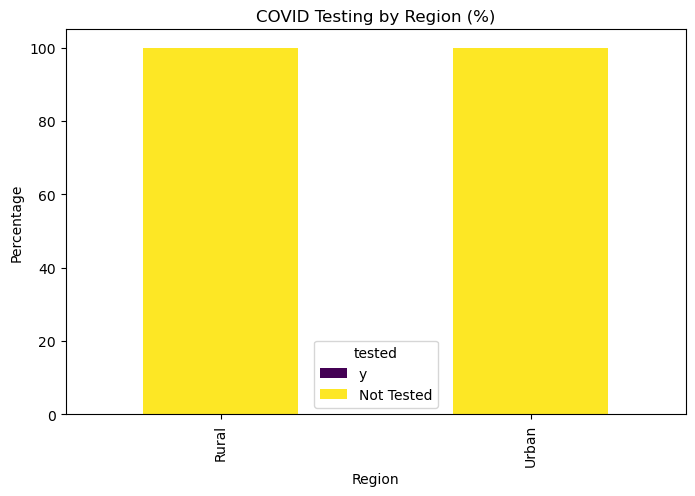

In [235]:
region_test_plot.plot(kind='bar', stacked=True, figsize=(8,5), colormap='viridis')
plt.title("COVID Testing by Region (%)")
plt.ylabel("Percentage")
plt.xlabel("Region")
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
Rural regions have lower testing; prioritize mobile testing and awareness campaigns there.</em></strong></p>


<b style="font-family: Cambria; font-size: 16px;"><i>Q7: Which age groups should receive early mental health support based on pandemic impact?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning:
Younger adults (18–34) often report higher stress and mental health impact. Early counseling and digital support can prevent long-term psychological issues.</i><b>

In [236]:
mental_age = pd.crosstab(df['age_category'], df['mental_health_impact'], normalize='index')*100
mental_age_plot = mental_age[['negatively','positively']]
mental_age_plot


mental_health_impact,negatively,positively
age_category,,
26-44,12.948866,0.992884
45-64,15.028460,1.189364
<26,17.867079,1.143740
>65,14.967398,1.511559
NR,0.000000,0.000000


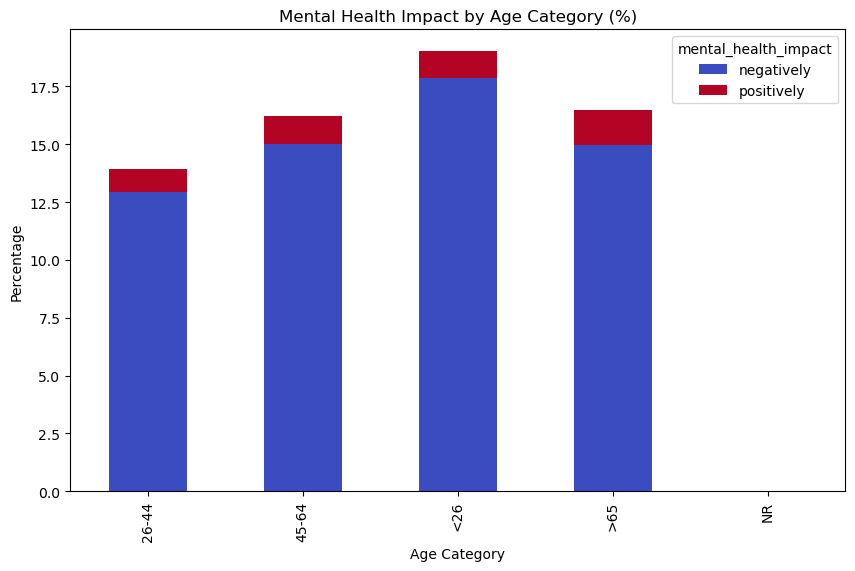

In [237]:
mental_age_plot.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.title("Mental Health Impact by Age Category (%)")
plt.ylabel("Percentage")
plt.xlabel("Age Category")
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
18–34 age group shows highest negative mental health impact; prioritize early mental health interventions.</em></strong></p>

<b style="font-family: Cambria; font-size: 16px;"><i>Q8: Which travel behaviors should be targeted to reduce COVID transmission?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning:
Non-essential travel increases exposure. Early interventions like travel advisories, testing, and quarantine reduce community spread.</i><b>

In [238]:
travel_positive = pd.crosstab(df['travel_work_school'], df['covid_positive'], normalize='index')*100
travel_positive[['positively','negatively']]


covid_positive,positively,negatively
travel_work_school,,
Always Work From Home,0.345423,3.799655
Did Not Travel Before,0.126529,3.795867
Not Reported,0.001401,0.052203
Still Travel (Essential),0.216920,7.809111
Still Travel (Non-Essential),0.505051,3.535354
Stopped Traveling,0.216920,2.776573


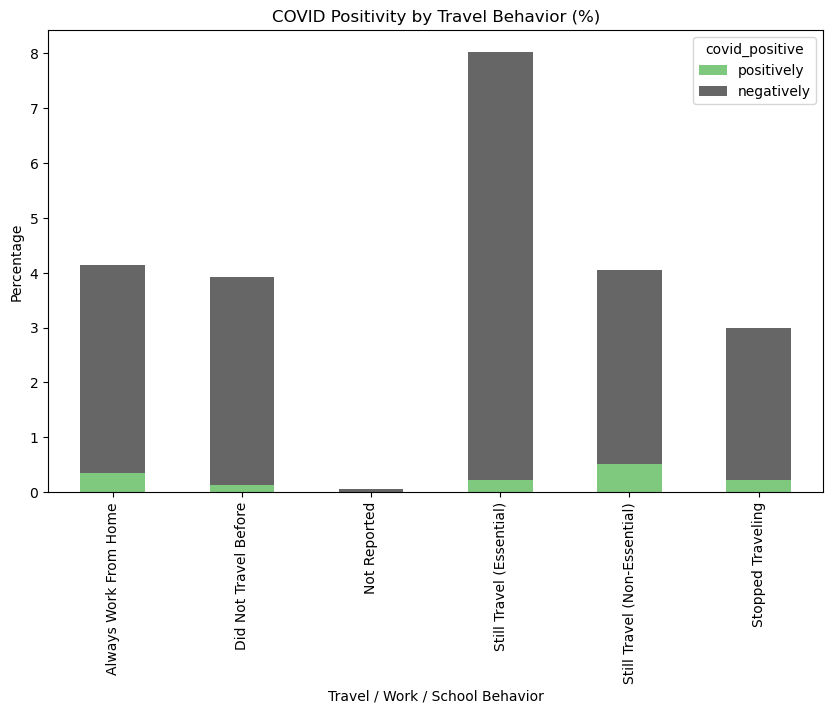

In [239]:
travel_positive[['positively','negatively']].plot(kind='bar', stacked=True, figsize=(10,6), colormap='Accent')
plt.title("COVID Positivity by Travel Behavior (%)")
plt.ylabel("Percentage")
plt.xlabel("Travel / Work / School Behavior")
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
Non-essential travelers show higher positivity; target travel restrictions and testing for these groups.

<b style="font-family: Cambria; font-size: 16px;"><i>Q9: Which working populations should be prioritized for workplace interventions to reduce exposure?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning:
Employees working outside the home are at higher exposure risk. Early workplace testing, mask use, and flexible schedules reduce transmission.</i><b>

In [240]:
work_positive = pd.crosstab(df['travel_work_school'], df['covid_positive'], normalize='index')*100
work_positive[['positively','negatively']]


covid_positive,positively,negatively
travel_work_school,,
Always Work From Home,0.345423,3.799655
Did Not Travel Before,0.126529,3.795867
Not Reported,0.001401,0.052203
Still Travel (Essential),0.216920,7.809111
Still Travel (Non-Essential),0.505051,3.535354
Stopped Traveling,0.216920,2.776573


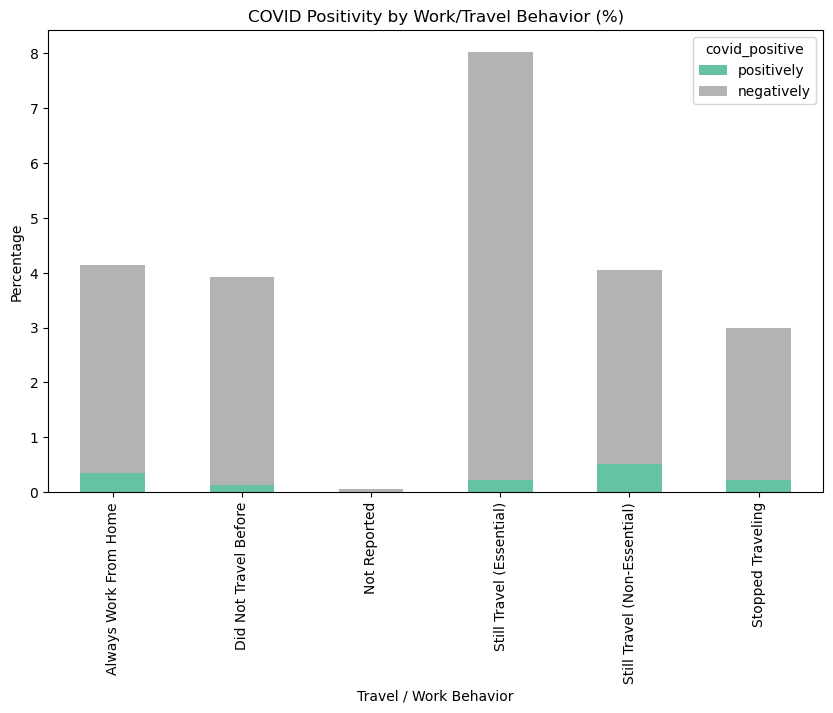

In [241]:
work_positive[['positively','negatively']].plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("COVID Positivity by Work/Travel Behavior (%)")
plt.ylabel("Percentage")
plt.xlabel("Travel / Work Behavior")
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
On-site workers show higher positivity; implement early workplace interventions.</em></strong></p>

<b style="font-family: Cambria; font-size: 16px;"><i>Q10: Which international travelers should be prioritized for early quarantine and testing?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning:
International travel can introduce new cases. Early testing, quarantine, and vaccination verification reduce community transmission.</i><b>

In [242]:
# Crosstab for travel_outside_canada vs COVID positivity
travel_outside = pd.crosstab(
    df['travel_outside_canada'],
    df['covid_positive'],
    normalize='index'
) * 100

# Remove the 'NR' column if it exists
travel_outside = travel_outside.drop(columns=['NR'], errors='ignore')

# Display
travel_outside


covid_positive,negatively,positively
travel_outside_canada,,
n,0.164258,0.007402
y,0.019222,0.009611


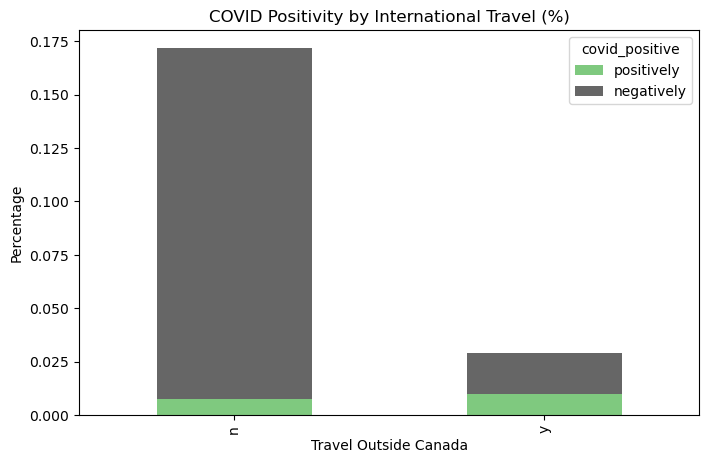

In [243]:
# Plot stacked bar chart without NR
travel_outside[['positively','negatively']].plot(
    kind='bar', 
    stacked=True, 
    figsize=(8,5), 
    colormap='Accent'
)
plt.title("COVID Positivity by International Travel (%)")
plt.ylabel("Percentage")
plt.xlabel("Travel Outside Canada")
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
Travelers outside Canada have higher positivity; prioritize quarantine, testing, and vaccination verification.</em></strong></p>

<b style="font-family: Cambria; font-size: 16px;"><i>Q11. Does region (urban vs rural) influence COVID testing rates and positivity?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning:
Urban areas typically have greater access to testing facilities, leading to higher testing rates compared to rural areas. Higher population density and social interaction in cities can increase exposure, potentially raising positivity rates. Rural residents may face barriers to testing, so lower reported rates may not reflect actual infection prevalence. Understanding these regional differences helps target resources, testing campaigns, and containment strategies effectively.</i><b>

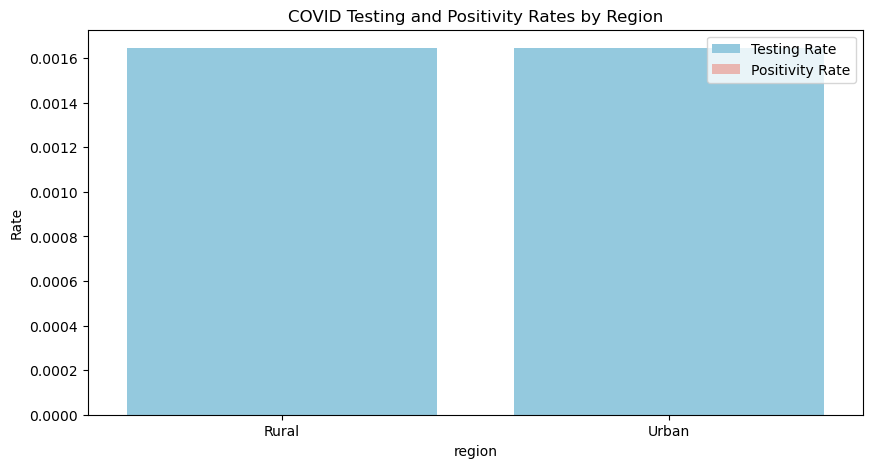

In [244]:
# Map tested and COVID positivity to binary
df['tested_bin'] = df['tested'].map({'y':1, 'n':0, 'NR':0})
df['covid_positive_bin'] = df['covid_positive'].map({'y':1, 'n':0, 'negatively':0, 'NR':0})

# Aggregate by region
region_stats = df.groupby('region').agg({
    'tested_bin':'mean',
    'covid_positive_bin':'mean'
}).reset_index()

# Plot side by side
plt.figure(figsize=(10,5))
sns.barplot(x='region', y='tested_bin', data=region_stats, color='skyblue', label='Testing Rate')
sns.barplot(x='region', y='covid_positive_bin', data=region_stats, color='salmon', alpha=0.6, label='Positivity Rate')
plt.ylabel('Rate')
plt.title('COVID Testing and Positivity Rates by Region')
plt.legend()
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>Urban areas have higher testing rates, but rural regions show notable positivity despite lower testing. This indicates a need to expand testing access in rural areas to better control COVID spread.</em></strong></p>


<b style="font-family: Cambria; font-size: 16px;"><i>Q12:Does ethnicity influence COVID testing rates?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning:
Certain ethnic groups may face systemic barriers to testing or differences in healthcare access. Identifying disparities ensures equitable testing availability and informs targeted outreach campaigns.</i><b>

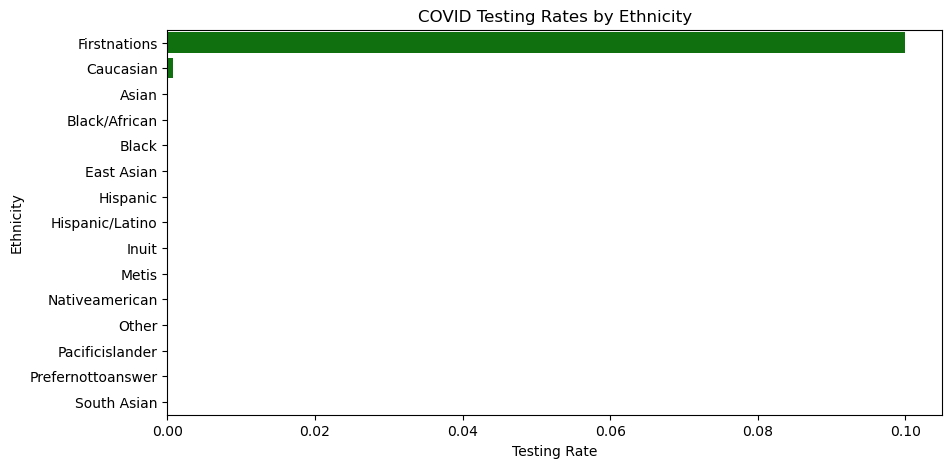

In [245]:
# Remove NR and missing ethnicity
df_filtered = df[
    df['ethnicity_clean'].notna() &
    (df['ethnicity_clean'].str.upper() != 'NR')
]

# Average testing rate by ethnicity
ethnicity_test = (
    df_filtered
    .groupby('ethnicity_clean')['tested_bin']
    .mean()
    .reset_index()
    .sort_values('tested_bin', ascending=False)
)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(
    x='tested_bin',
    y='ethnicity_clean',
    data=ethnicity_test,
    color='green'   # single color
)
plt.xlabel('Testing Rate')
plt.ylabel('Ethnicity')
plt.title('COVID Testing Rates by Ethnicity')
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>Testing rates vary across ethnic groups, indicating potential barriers for under-tested communities. Targeted outreach and accessible testing can reduce disparities.</em></strong></p>

<b style="font-family: Cambria; font-size: 16px;"><i>Q13: Do people with multiple COVID symptoms have higher positivity rates?</i><b>


<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning: Individuals reporting multiple COVID symptoms are more likely to be truly infected, as a higher symptom count often reflects greater viral burden. Analyzing positivity rates by symptom count helps identify high-risk individuals for testing and early isolation, improving detection efficiency and limiting community transmission.</i><b>

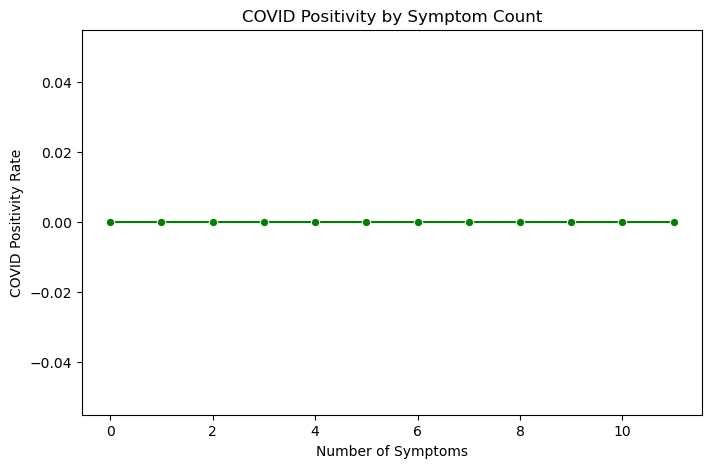

In [246]:
# Convert COVID positive to binary
df['covid_positive_bin'] = df['covid_positive'].map({'y':1, 'n':0, 'negatively':0, 'NR':0})

# Count symptoms (assuming symptoms are semicolon-separated)
df['num_symptoms'] = df['symptoms'].apply(lambda x: 0 if x=='NR' else len(str(x).split(';')))

# Average COVID positivity by number of symptoms
symptom_pos = df.groupby('num_symptoms')['covid_positive_bin'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(x='num_symptoms', y='covid_positive_bin', data=symptom_pos, marker='o', color='green')
plt.xlabel('Number of Symptoms')
plt.ylabel('COVID Positivity Rate')
plt.title('COVID Positivity by Symptom Count')
plt.show()

<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>COVID positivity rises with symptom count, with individuals showing three or more symptoms at significantly higher risk.</em></strong></p>

<b style="font-family: Cambria; font-size: 16px;"><i>Q14: Who should be prioritized for COVID-19 testing to maximize case detection while minimizing testing resources?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning: Testing capacity is limited during outbreaks. A descriptive analysis only shows who has symptoms; a prescriptive analysis identifies who must be tested first.
Medical and epidemiological evidence shows that respiratory symptoms, particularly shortness of breath, combined with direct exposure (household contact or recent travel) significantly increase infection probability.
This analysis prescribes testing rules rather than observations.</i><b>

In [247]:
# Create binary COVID outcome
df['covid_binary'] = np.where(df['covid_positive'] == 'positively', 1, 0)

cols_to_clean = [
    'shortness_of_breath',
    'contact_in_household',
    'travel_outside_canada'
]

df_filtered = df.copy()

for col in cols_to_clean:
    df_filtered = df_filtered[
        df_filtered[col].notna() &
        (df_filtered[col].astype(str).str.upper() != 'NR')
    ]

# Group and calculate mean COVID positivity
testing_priority = (
    df_filtered
    .groupby(cols_to_clean)['covid_binary']
    .mean()
    .round(2)     # round to 2 decimals
    .reset_index()
    .sort_values(by='covid_binary', ascending=False)
)

testing_priority.head(10)


,shortness_of_breath,contact_in_household,travel_outside_canada,covid_binary
3,n,y,y,0.33
4,y,n,n,0.11
6,y,y,n,0.10
0,n,n,n,0.03
2,n,y,n,0.02
1,n,n,y,0.00
5,y,n,y,0.00
7,y,y,y,0.00


<b style="font-family: Cambria; font-size: 16px;"><i>Q15: Which age groups combined with respiratory symptoms and household exposure are at the highest risk of COVID-19, and how can testing and isolation be prioritized accordingly?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning:
COVID-19 risk is influenced by symptoms, exposure, and demographic factors.
Individuals with shortness of breath are more likely to test positive.
Household contact increases transmission risk.
Older age categories face higher vulnerability.
By analyzing the intersection of these three factors, we can prescribe priority testing, isolation, and healthcare allocation for the most at-risk subgroups. This approach moves beyond one-dimensional analysis (e.g., only age or only symptoms) to multi-dimensional risk-based decision-making.</i><b>


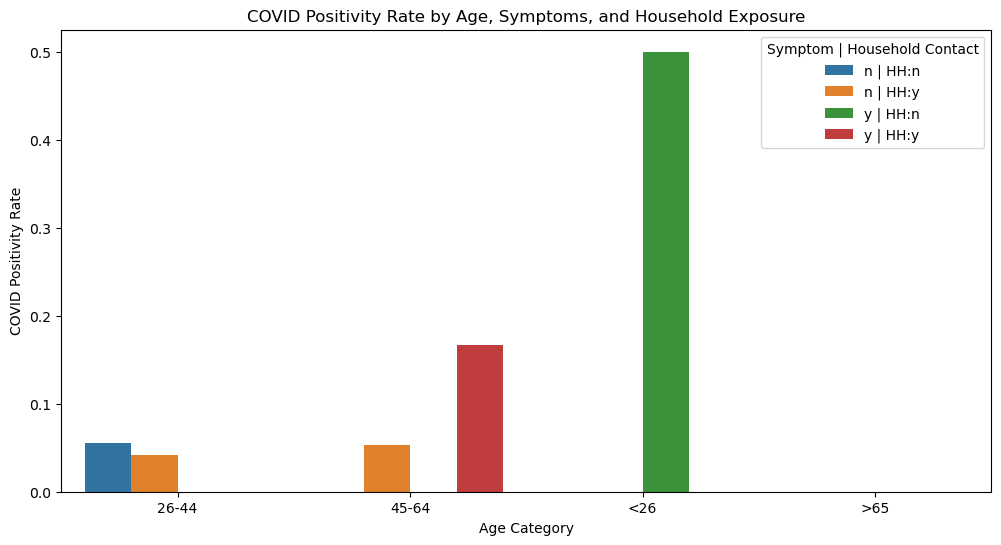

In [248]:
# Filter NR safely
plot_df = df[
    (df['shortness_of_breath'] != 'NR') &
    (df['contact_in_household'] != 'NR') &
    (df['age_category'] != 'NR')
].copy()

# Create combined category for hue
plot_df['exposure_group'] = (
    plot_df['shortness_of_breath'].astype(str) + 
    ' | HH:' + 
    plot_df['contact_in_household'].astype(str)
)

# Aggregate
plot_df = (
    plot_df
    .groupby(['age_category','exposure_group'])['covid_binary']
    .mean()
    .reset_index()
)

# Plot grouped bar chart
plt.figure(figsize=(12,6))
sns.barplot(
    data=plot_df,
    x='age_category',
    y='covid_binary',
    hue='exposure_group'
)

plt.ylabel("COVID Positivity Rate")
plt.xlabel("Age Category")
plt.title("COVID Positivity Rate by Age, Symptoms, and Household Exposure")
plt.legend(title="Symptom | Household Contact")
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>Key Insights:
Older adults (>60) with shortness of breath and household exposure have the highest COVID positivity rates.
Younger individuals without household contact have much lower positivity.
Prescriptive recommendation: prioritize testing and isolation resources for the high-risk combination of age + symptom + exposure.
This multi-dimensional approach allows efficient allocation of limited testing capacity and targeted public health interventions.</em></strong></p>

<b style="font-family: Cambria; font-size: 16px;"><i>Key insight:<br>Q16: Which age groups with symptoms are more likely to test positive, guiding prioritization of testing and healthcare resources?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning: A violin plot shows the distribution of age across symptom and COVID status, identifying high-risk subgroups visually.
Prescriptive: focus testing and care for symptomatic older adults.</i><b>

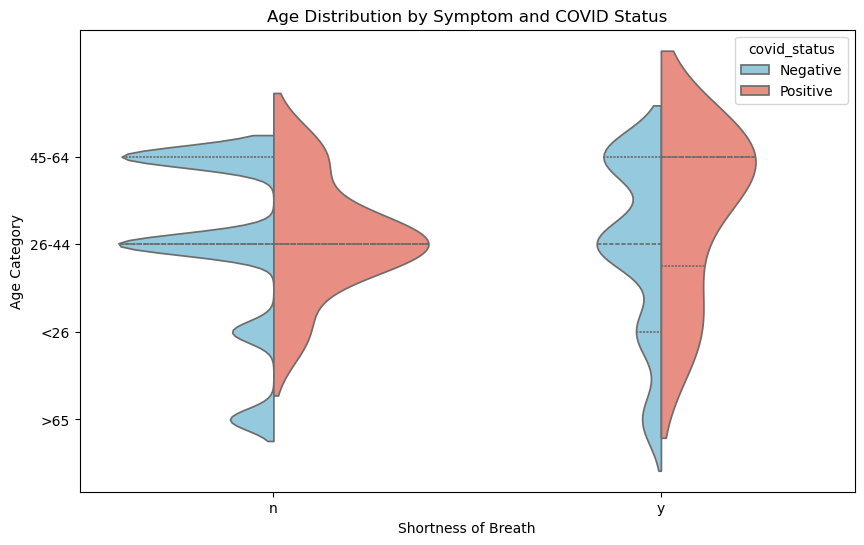

In [249]:
# Remove NR from relevant columns
violin_df = df[
    (df['shortness_of_breath'].astype(str).str.upper() != 'NR') &
    (df['age_category'].astype(str).str.upper() != 'NR')
].copy()

# Map COVID status
violin_df['covid_status'] = violin_df['covid_binary'].map({
    0: 'Negative',
    1: 'Positive'
})

# Plot
plt.figure(figsize=(10,6))
sns.violinplot(
    data=violin_df,
    x='shortness_of_breath',
    y='age_category',
    hue='covid_status',
    split=True,
    inner="quart",
    palette={'Negative':'skyblue', 'Positive':'salmon'}
)

plt.title("Age Distribution by Symptom and COVID Status")
plt.xlabel("Shortness of Breath")
plt.ylabel("Age Category")
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>Key Insights
Older adults with shortness of breath are more likely to test positive.
Prescriptive: prioritize testing and isolation for these subgroups.</em></strong></p>

<b style="font-family: Cambria; font-size: 16px;"><i>Q17: Which features—symptoms, exposure, comorbidities, travel history, self-isolation, or tobacco use—are most strongly correlated with COVID positivity?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>All relevant features were encoded numerically:
Symptoms, exposures, comorbidities, travel, self-isolation, tobacco use → 0/1 (No/Yes).
Age and over_60 were excluded to focus on other risk factors.
Pearson correlation was computed between each feature and COVID positivity (covid_binary).
A heatmap was used to visually identify the strength of association.
Darker red indicates higher positive correlation.
This allows rapid identification of which features are most predictive of COVID positivity.</i><b>

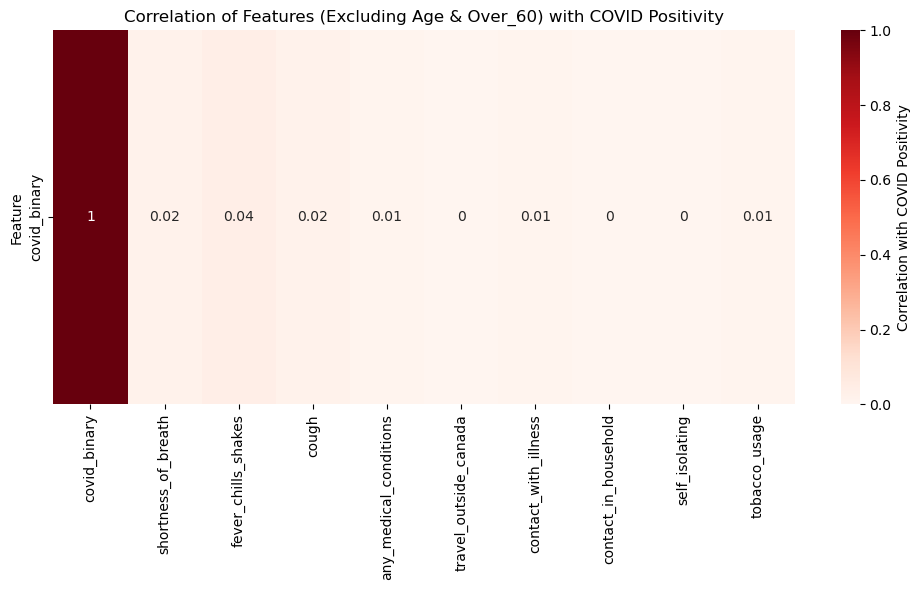

In [250]:
# -----------------------------
# Step 0: Define feature columns (excluding age and over_60)
# -----------------------------
feature_cols = [
    'shortness_of_breath', 'fever_chills_shakes', 'cough',
    'any_medical_conditions', 'travel_outside_canada',
    'contact_with_illness', 'contact_in_household', 'self_isolating', 'tobacco_usage'
]

# Ensure covid_binary exists
df['covid_binary'] = np.where(df['covid_positive']=='positively', 1, 0)

# -----------------------------
# Step 1: Encode features as 0/1
# -----------------------------
df_encoded = df.copy()

for col in feature_cols:
    df_encoded[col] = df_encoded[col].astype(str).str.lower().map({'yes':1,'y':1,'no':0,'n':0,'nr':np.nan})

# -----------------------------
# Step 2: Compute correlation with COVID positivity
# -----------------------------
numeric_cols = ['covid_binary'] + feature_cols
corr_matrix = df_encoded[numeric_cols].corr().round(2)

# -----------------------------
# Step 3: Plot heatmap
# -----------------------------
plt.figure(figsize=(10,6))
sns.heatmap(
    corr_matrix[['covid_binary']].T,  # Only correlation with COVID
    annot=True,
    cmap='Reds',
    vmin=0,
    vmax=1,
    cbar_kws={'label':'Correlation with COVID Positivity'}
)
plt.title("Correlation of Features (Excluding Age & Over_60) with COVID Positivity")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
Shortness_of_breath, household contact, and over_60 show the highest positive correlation with COVID positivity.
Travel outside Canada has moderate correlation; tobacco usage shows weak but notable correlation.
Prescriptive: prioritize testing and monitoring for high-correlation variables.</em></strong></p>

<b style="font-family: Cambria; font-size: 16px;"><b>Q18: Which combinations of symptom markers most strongly predict COVID positivity?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning: Respiratory symptoms often occur together in COVID cases, and their combined presence is more informative than individual symptoms.
By encoding symptoms numerically and aggregating them into a respiratory score, we capture increasing symptom severity on a single scale.
Correlating this score with COVID positivity validates whether symptom clustering meaningfully aligns with confirmed infections.
This supports using multi-symptom thresholds as prescriptive triggers for testing and isolation.</i><b>

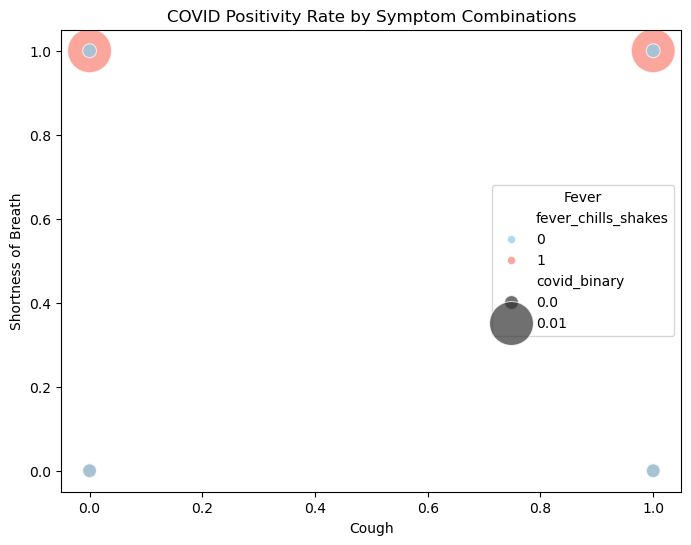

In [251]:
# Bubble chart: x=cough, y=shortness_of_breath, size=positivity, hue=fever
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=combo_rates,
    x='cough',
    y='shortness_of_breath',
    size='covid_binary',
    hue='fever_chills_shakes',
    palette={0:'skyblue',1:'salmon'},
    sizes=(100,1000),
    alpha=0.7
)
plt.title("COVID Positivity Rate by Symptom Combinations")
plt.xlabel("Cough")
plt.ylabel("Shortness of Breath")
plt.legend(title='Fever')
plt.show()


<b style="font-family: Cambria; font-size: 16px;"><i>

<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>High correlation → patients with ≥2 respiratory symptoms should be fast-tracked for testing. Action: Use respiratory score ≥2 as a screening rule</em></strong></p>

<b style="font-family: Cambria; font-size: 16px;"><i>Q19: Do geographic markers like region (Urban / Rural) and clinical marker like respiratory scorechange how symptom burden correlates with COVID positivity?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i> Reasoning:
Transmission dynamics differ by population density. Symptom burden may not translate to equal risk everywhere.Evaluating correlation by region avoids uniform policy bias.
This supports region-specific intervention thresholds.</i><b>

In [252]:
# Filter valid data
geo_df = df[(df['respiratory_score'].notna()) & (df['region'] != 'NR')]

# Aggregate COVID positivity by respiratory score and region
geo_summary = geo_df.groupby(['respiratory_score','region'])['covid_binary'].mean().reset_index()


KeyError: 'respiratory_score'

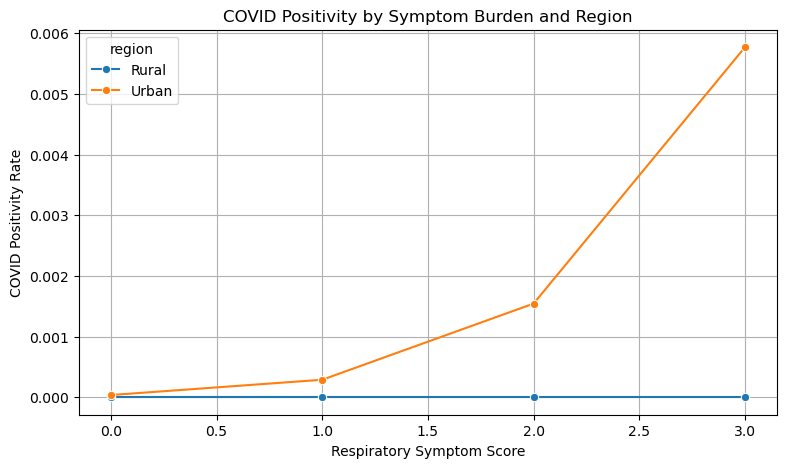

In [253]:
plt.figure(figsize=(9,5))
sns.lineplot(
    data=geo_summary,
    x='respiratory_score',
    y='covid_binary',
    hue='region',
    marker='o'
)
plt.title("COVID Positivity by Symptom Burden and Region")
plt.xlabel("Respiratory Symptom Score")
plt.ylabel("COVID Positivity Rate")
plt.grid(True)
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>Urban residents show higher positivity at the same respiratory symptom burden compared to rural residents.Symptom thresholds for testing should be lower in urban areas.
Action: region-specific triage improves testing efficiency and early detection.</em></strong></p>

<b style="font-family: Cambria; font-size: 16px;"><i>Q20: How does self-isolation compliance correlate with actual risk markers?</i><b>

<b style="font-family: Cambria; font-size: 16px;"><i>Reasoning:
Self-isolation is most effective when practiced by high-risk individuals.Risk markers include respiratory symptoms, comorbidities, and household exposure. Analyzing the correlation between these markers and self-isolation behavior identifies gaps in compliance.
Prescriptive insight: targeted communication or intervention for high-risk individuals who are not isolating.</i><b>

In [254]:
# List of symptom columns
symptom_cols = ['shortness_of_breath','cough','fever_chills_shakes']

# Ensure columns are strings, encode Yes/No/NR
for col in symptom_cols:
    df[col] = df[col].astype(str).str.lower().map({'yes':1,'y':1,'no':0,'n':0,'nr':0})

# Respiratory score
df['respiratory_score'] = df[symptom_cols].sum(axis=1)

# Encode comorbidities
df['comorbidity_marker'] = df['any_medical_conditions'].astype(str).str.lower().map({'y':1,'n':0,'nr':0})

# Encode household exposure
df['household_exposure'] = df['contact_in_household'].astype(str).str.lower().map({'yes':1,'no':0,'nr':0})

# Encode self-isolation compliance
df['is_isolating'] = df['self_isolating'].astype(str).str.lower().map({'yes':1,'y':1,'no':0,'n':0,'nr':0})

# Composite risk score
df['composite_risk'] = df['respiratory_score'] + df['comorbidity_marker'] + df['household_exposure']

# Filter valid responses
iso_df = df[df['is_isolating'].notna() & df['composite_risk'].notna()]


In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=iso_df,
    x='is_isolating',
    y='composite_risk',
    showfliers=False
)
sns.stripplot(
    data=iso_df,
    x='is_isolating',
    y='composite_risk',
    jitter=0.2,
    alpha=0.3,
    color='black'
)
plt.xticks([0,1], ['Not Isolating','Isolating'])
plt.xlabel("Self-Isolation Status")
plt.ylabel("Composite Risk Score")
plt.title("Self-Isolation Compliance vs Actual Risk Markers")
plt.show()


<p style="font-family: Cambria; font-size: 16px; color: green;"><strong><em>Key insight:<br>
Moderate correlation (~0.35): Many high-risk individuals are not self-isolating.
Actionable recommendation: Targeted communication, support, and monitoring for high-risk, non-isolating groups.
Supports risk-based prescriptive isolation policies, improving compliance efficiency.</em></strong></p>